# Reviewer for Finals in DMW

This reviewer is meant to supplement the Reader’s existing reviewers and notes. The author of this notebook shall not assume any responsibility on the accuracy and completeness of any information provided in this reviewer. The Reader is
expected to exercise prudence in reading through the reviewer and is free to comment on its accuracy and
completeness for everyone's benefit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.testing import (assert_equal, assert_almost_equal, 
                           assert_array_equal, assert_array_almost_equal)

In this reviewer, we will use the `Heart Disease UCI Dataset`. A detailed description of dataset can be accessed [here](https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7). This dataset is available in [kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).

Information about the Heart Disease UCI Dataset
---

- `age`: The person’s age in years

- `sex`: The person’s sex (1 = male, 0 = female)

- `cp`: chest pain type
   - Value 0: asymptomatic
   - Value 1: atypical angina
   - Value 2: non-anginal pain
   - Value 3: typical angina
    
- `trestbps`: The person’s resting blood pressure (mm Hg on admission to the hospital)

- `chol`: The person’s cholesterol measurement in mg/dl

- `fbs`: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

- `restecg`: resting electrocardiographic results
    - Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    - Value 1: normal
    - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

- `thalach`: The person’s maximum heart rate achieved

- `exang`: Exercise induced angina (1 = yes; 0 = no)

- `oldpeak`: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

- `slope`: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
    - 0: downsloping
    - 1: flat
    - 2: upsloping

- `ca`: The number of major vessels (0–3)

- `thal`: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
    - 1: fixed defect (no blood flow in some part of the heart)
    - 2: normal blood flow
    - 3: reversible defect (a blood flow is observed but it is not normal)

- `target`: Heart disease (1 = no, 0= yes)

In [2]:
# read UCI Heart Disease Data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# check shape of data
df.shape

(303, 14)

In [4]:
# check data types of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Preliminaries

The following are some preliminaries that need to be done in order to perform further analysis to a given dataset:
- Find **target feature**.
- Identify **numeric**, **categorical**, and **bag-of-words** feature.
- Perform `one-hot` encoding if **categorical** variables are present.
- Perform `TF-IDF` vectorization if **bag-of-words** feature/s are present.

Identify Numeric, Categoric, *Bag-of-Words* Columns/Features
---

|Column/Attribute Name| Data Type | Description |
| :--- | :--- | :---- |
| age | int | numeric |
| sex | int |categoric|
| cp |int | categoric |
| trestbps |int | numeric |
| chol | int| numeric |
| fbs | int | categoric |
| restecg | int| categoric |
| thalach | int| numeric |
| exang | int| categoric |
| oldpeak | float | numeric |
| slope | int| categoric |
| ca | int| numeric |
| thal | int| categoric |
| target | int| categoric |

In [5]:
# get target feature
df_target = df['target']
df_target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
# get numeric columns
col_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
df_num = df[col_num]
df_num

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


In [7]:
# get categoric columns with three or more variables
col_cat_3 = ['cp', 'restecg', 'slope', 'thal']
df_cat_3 = df[col_cat_3]
df_cat_3

,cp,restecg,slope,thal
0,3,0,0,1
1,2,1,0,2
2,1,0,2,2
3,1,1,2,2
4,0,1,2,2
...,...,...,...,...
298,0,1,1,3
299,3,1,1,3
300,0,1,1,3
301,0,1,1,3


In [8]:
# since integer, make these values categorical
for col in col_cat_3:
    df_cat_3[col] = df_cat_3[col].astype('category')
df_cat_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cp       303 non-null    category
 1   restecg  303 non-null    category
 2   slope    303 non-null    category
 3   thal     303 non-null    category
dtypes: category(4)
memory usage: 2.0 KB


<ipython-input-8-620bd21ea111>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_3[col] = df_cat_3[col].astype('category')


In [9]:
# perform one-hot encoding on categoric columns with three or more variables
df_cat_3_one_hot = pd.get_dummies(df_cat_3)
df_cat_3_one_hot.head()

,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [10]:
# get categoric columns with 2 variables only
col_cat_2 = ['sex', 'fbs', 'exang']
df_cat_2 = df[col_cat_2]
df_cat_2.head()

,sex,fbs,exang
0,1,1,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,0,1


In [11]:
# concatenate dataframe
df_final = pd.concat([df_num, df_cat_2, df_cat_3_one_hot, df_target], axis=1)
df_final.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex,fbs,exang,cp_0,...,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,target
0,63,145,233,150,2.3,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,37,130,250,187,3.5,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,56,120,236,178,0.8,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
4,57,120,354,163,0.6,0,0,0,1,1,...,1,0,0,0,1,0,0,1,0,1


# Information Retrieval

## Practice Problem 1

Create a function `closest_euc_p1` that accepts `df_final` and returns the 10 patient `id`s (this is the index) by increasing Euclidean distance from patient `id` `200`, precision and recall. A result is considered relevant if it comes from the same `target` as the query.

In [12]:
from scipy.spatial.distance import euclidean, cityblock, cosine

def nearest_k(query, objects, k, dist):
    """Return the indices to objects most similar to query"""
    return np.argsort([dist(query, obj) for obj in objects])[:k]

def closest_euc_p1(df_final):
    # get query
    query = df_final.loc[200].to_numpy()
    
    # get actual
    actual = query[23]
    
    # get objects
    objects = df_final.to_numpy()
    
    # get all labels
    all_labels = (df_final.to_numpy())[:, 23]
    all_labels = np.array(all_labels)
    
    # get res
    res = nearest_k(query, objects, 10, euclidean)
    
    # get relevant res
    rel = 0
    for i in res:
        if all_labels[i] == actual:
            rel += 1
        else:
            rel += 0
    
    # get irrelevant res
    irr = 0
    for i in range(len(all_labels)):
        if (all_labels[i] != actual) and (i not in res):
            irr += 1
        else:
            irr += 0
    
    # get tp, fp, fn, tn
    tp = rel
    fp = len(res) - tp
    fn = len(all_labels) - len(res) - irr
    tn = irr
    
    # calculate for precision and recall
    prec = tp/(tp + fp)
    rec = tp/(tp + fn)
    return res, prec, rec

In [13]:
res, prec, rec = closest_euc_p1(df_final)
res, prec, rec

(array([200, 118,  30, 157, 142, 124,  58,  62, 113,   2]),
 0.1,
 0.00641025641025641)

In [14]:
df_final.loc[res]

,age,trestbps,chol,thalach,oldpeak,ca,sex,fbs,exang,cp_0,...,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,target
200,44,110,197,177,0.0,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
118,46,105,204,172,0.0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
30,41,105,198,168,0.0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
157,35,122,192,174,0.0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
142,42,120,209,173,0.0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
124,39,94,199,179,0.0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
58,34,118,182,174,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
62,52,118,186,190,0.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
113,43,110,211,161,0.0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,1
2,41,130,204,172,1.4,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


## Practice Problem 2

Create a function `compute_auc_euc_p2` that accepts `df_final` and returns the AUC distance when the patient `id` `200` is the query and Euclidean distance is the metric. A result is considered relevant if it comes from the same `target` as the query.

In [16]:
def get_confusion(actual, results, all_labels):
    index_labels = set(range(len(all_labels)))
    index_results = set(results)
    index_non = list(index_labels - index_results)
    label_non = []
    for i in index_non:
        label_non.append(all_labels[i])
    label_res = []
    for i in results:
        label_res.append(all_labels[i])
    TP = 0
    for i in label_res:
        if i == actual:
            TP += 1
    FP = len(label_res) - TP
    FN = 0
    for i in label_non:
        if i == actual:
            FN += 1
    TN = len(label_non) - FN
    matrix = pd.DataFrame({'relevant': [TP, FN], 'irrelevant':[FP, TN]})
    matrix.index = ['relevant', 'irrelevant']
    return matrix

def precision(confusion):
    r = confusion.iloc[0, 0]
    k = r + confusion.iloc[0, 1]
    p = r/k
    return p

def recall(confusion):
    r = confusion.iloc[0, 0]
    n = r + confusion.iloc[1, 0]
    rec = r/n
    return rec

def auc_pr(query, objects, dist, actual, all_labels):
    init_rec, init_prec = [0], [1]
    k_res = nearest_k(query, objects, len(objects), dist)
    
    for k in range(1, len(objects) + 1):
        results = k_res[:k]
        confusion = get_confusion(actual, results, all_labels)
        init_rec.append(recall(confusion))
        init_prec.append(precision(confusion))
        
    area_curve = np.trapz(init_prec, init_rec)
    return area_curve

In [17]:
def compute_auc_euc_p2(df_final):
    # get query
    query = df_final.loc[200].to_numpy()
    
    # get actual
    actual = query[23]
    
    # get objects
    objects = df_final.to_numpy()
    
    # get all labels
    all_labels = (df_final.to_numpy())[:, 23]
    all_labels = np.array(all_labels)
    
    auc = auc_pr(query, objects, euclidean, actual, all_labels)
    return auc

In [18]:
compute_auc_euc_p2(df_final)

0.3571243542385059

## Practice Problem 2 (Aside)

Plot the PR-curve of the results given above. What can you say about the resulting graph?

In [19]:
def pr_curve(query, objects, dist, actual, all_labels):
    init_rec, init_prec = [0], [1]
    k_res = nearest_k(query, objects, len(objects), dist)
    
    for k in range(1, len(objects) + 1):
        results = k_res[:k]
        confusion = get_confusion(actual, results, all_labels)
        init_rec.append(recall(confusion))
        init_prec.append(precision(confusion))

    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_aspect('equal')
    ax.step(init_rec, init_prec, where='post')
    ax.fill_between(init_rec, init_prec, step='post')
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    plt.show()
    return ax

In [20]:
# get query
query = df_final.loc[200].to_numpy()

# get actual
actual = query[23]

# get objects
objects = df_final.to_numpy()

# get all labels
all_labels = (df_final.to_numpy())[:, 23]
all_labels = np.array(all_labels)

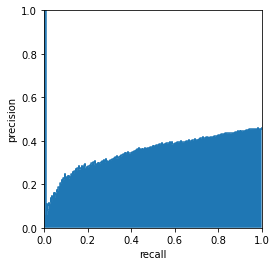

In [21]:
pr_curve(query, objects, euclidean, actual, all_labels);

# Dimensionality Reduction and Clustering

Note that when performing dimensionality reduction and clustering, the `target` feature is removed from the dataset.

## Practice Problem 3

Perform dimensionality reduction on `df_final` using one of the methods discussed in class. Justify your choice of dimensionality reduction method.

Your answer here

In [22]:
# Your code here

## Practice Problem 4

Interpret the results of the dimensionality reduction.

Your answer here

## Practice Problem 5

Cluster `df_final` (with reduced dimensions), i.e., assign a cluster label to each patient, using an representative based clustering method. What is the best value for the number of clusters? Justify your choice of method and your best number of clusters.

Your answer here

In [23]:
# Your code here

## Practice Problem 6

Cluster `df_final` (with reduced dimensions), i.e., assign a cluster label to each patient, using an agglomerative clustering method. What is the best value for the number of clusters? Justify your choice of method and your best number of clusters.

Your answer here

In [24]:
# Your code here